# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\522147\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


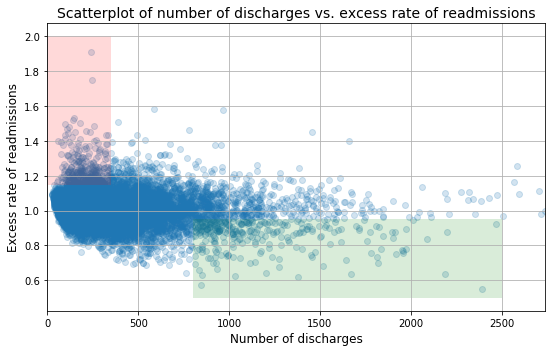

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [6]:
clean_hospital_read_df.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11578.000000,11578.000000,81.0,11497.000000,11497.000000,11497.000000,11497.000000
mean,257681.537226,362.909397,7.0,1.007504,17.984292,17.865695,63.633731
std,154542.645531,309.176945,0.0,0.091964,5.487651,5.240749,59.540296
min,10001.000000,0.000000,7.0,0.549500,2.700000,3.900000,11.000000
25%,110129.750000,157.000000,7.0,0.952600,16.300000,16.600000,24.000000
50%,250040.000000,280.000000,7.0,1.003500,19.000000,19.000000,45.000000
75%,390041.000000,472.750000,7.0,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,7.0,1.909500,32.800000,28.000000,879.000000


In [9]:
clean_hospital_read_df['Measure Name'].value_counts()

READM-30-HF-HRRP          2841
READM-30-PN-HRRP          2799
READM-30-COPD-HRRP        2738
READM-30-AMI-HRRP         1807
READM-30-HIP-KNEE-HRRP    1393
Name: Measure Name, dtype: int64

## Q1: Do you agree with the analysis ?

I do not agree with the analysis:

Given the large number of data points (11,578), one scatter plot is insufficient to state that the number of readmissions is dropping with the increase  
number of discharges. First, there are five separate procedures shown above. Some hospitals specialize in center procedures which may increase the volume of   
procedures and lower the readmission rate given their expertise and success rate in the those procedures. Smaller hospitals may be impacted byb having to   
perform a broader set of procedures without the ability to specialize and that may inpact their readmission rate.

Based on the describe function above, 280 discharges is the median value but the study considers hospitals < 300 admissions as small. The study results looks  
at hospitals the readmission rates for hospitals with < 100 discharges and for > 1000 discharges and states the larger hospitals have a lower readmission rate. 
The definition of "small" hospitals is inconsistent.

This analysis was based upon one chart with a dense amount of data in a compressed area. More analysis should be performed.

## Q2: Conduct a statistically sound analysis 
2.1) Check for normalty of distributions  
2.2) Setup an appropriate hypothesis test  
2.3) Report the observed p-value, statistical significance for alpha = 0.01

In [11]:
#2.1 Normality of distributions
from scipy.stats import normaltest
import seaborn as sns

In [12]:
def check_significance(p_val, alpha):
    if p_val < alpha:
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")

In [13]:
def normal_hypoth_test(data, alpha):
    
    # calculate statistic & p-value
    statistic, p_val = normaltest(clean_hospital_read_df['Number of Discharges'])
    print('chi-square statistic:',statistic)
    print('p value =',p_val)
    # check significance
    check_significance(p_val, alpha)
    
    return statistic, p_val

C:\Users\522147\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


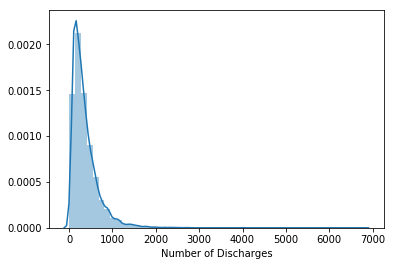

In [14]:
ax = sns.distplot(clean_hospital_read_df['Number of Discharges'])

In [16]:
# conduct normal test on number of discharges
stat, p_val = normal_hypoth_test(clean_hospital_read_df['Number of Discharges'], alpha=0.05)

chi-square statistic: 8412.44775274452
p value = 0.0
The null hypothesis can be rejected


C:\Users\522147\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


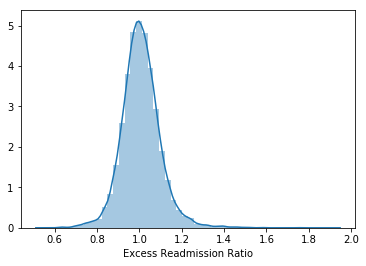

In [18]:
ax = sns.distplot(clean_hospital_read_df['Excess Readmission Ratio'].dropna())

In [20]:
# conduct normal test on number of discharges
stat, p_val = normal_hypoth_test(clean_hospital_read_df['Excess Readmission Ratio'].dropna(), alpha=0.05)

chi-square statistic: 8412.44775274452
p value = 0.0
The null hypothesis can be rejected


Comment: Both the number of discharges and excess readmission rates are skewed to the right. The excess readmission rates are more  
important as the number of discharges is used to determine the hospital size. 

### 2.2) Setup and appropriate hypthosis test

1) t-test for the correlation coeffienct, pho, to investigate the existence of a linear relationship between two populations

2) Null hypothesis pho = 0 (assume no relation between the two populations, alternative hypothesis: pho != 0 (either a positive or negative correlation)

### 3)  Report the observed p-value, statistical significance for alpha = 0.01

In [25]:
# conduct hypothesis test for pearson correlation coefficient
from scipy import stats
discharges = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 0]['Number of Discharges']
readmission = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 0]['Excess Readmission Ratio']
pho, p_val = stats.pearsonr(discharges, readmission)

print('correlation coefficient:',pho)
print('p value =',p_val)
check_significance(p_val, alpha=0.01)

correlation coefficient: -0.09739794351079353
p value = 1.222547377680967e-25
The null hypothesis can be rejected


The very low p-value (1.22 e-25) shows a statistically significant correlation for the number of discharges at a hospital and their excess readmission rate.

## 4) Discuss statistical significance and practice significance. Do they differ here ? Hoes does this change your recommendation to the client ?

Statistical significance refers to the actual mathmatical values (i.e. p-value) of the study. This assumes there is no sample error and the p-value is correct and  
that the results are not based on "chance".

Practice significance is about determining if the resulting analysis is useful in the context of the problem we are trying to study.

In this study, the low p-value states the readmission rate is correlated to the discharge rate however as discussed above, there are several other variables  
(procedure performed, skill set of the hosptical and doctors, etc) that means we can not simply assume a larger, high discharge number hospital has a lower  
readmission rate.



## 5) Look at the scatterplot above. 
  + What are the advantages and disadvantages of using this original scatter plot to convey information ?  
  Advantages:  
  1) green and red regions attempt to show key data points / areas supporting the initial conclusion  
  2) scatterplot shows the distribution of the data and the outliers
              
  Disadvantages:  
  1) dense grouping of the data hides to data relationships  
  2) no distribution plots of the x or y axis to show if the data is normally distributed
  
  + Construct another plot that conveys the same information in a more direct manner

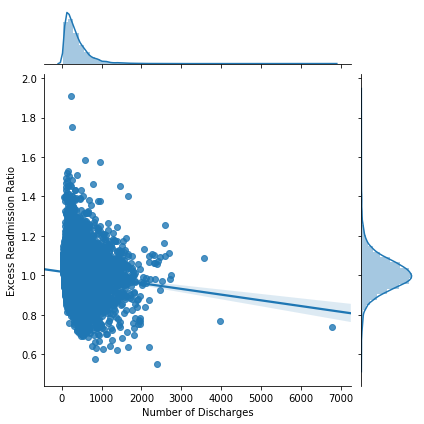

In [28]:
sns.jointplot(discharges, readmission, kind='reg')

The updated chart above provides the information in a more direct manner by  
1) showing a linear regression line of the number of readmissions correlated to the number of discharges
2) distribution plots show the normally distributed readmission ratio